In [12]:
from qiskit import Aer, IBMQ
from qiskit.aqua.algorithms import Shor, Grover
from qiskit.aqua.components.oracles import TruthTableOracle, LogicalExpressionOracle
from qiskit.visualization import plot_histogram
import qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization import *
from qiskit.tools.monitor import backend_overview

In [5]:
provider = IBMQ.load_account()

C:\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [6]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [13]:
backend_overview()

ibmq_santiago                ibmq_athens                  ibmq_armonk
-------------                -----------                  -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 8              Pending Jobs: 3              Pending Jobs: 7
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      145.4          Avg. T1:      74.3           Avg. T1:      164.4
Avg. T2:      133.0          Avg. T2:      99.0           Avg. T2:      177.7



ibmq_valencia               ibmq_ourense                 ibmq_vigo
-------------               ------------                 ---------
Num. Qubits:  5             Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 1             Pending Jobs: 1              Pending Jobs: 1
Least busy:   True          Least busy:   False          Least busy:   False
Operational:  True          Operational: 

In [20]:
backend=provider.get_backend('ibmq_valencia')

In [21]:
import pprint
pprint.pprint(backend.configuration().coupling_map)

[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]


In [22]:
pprint.pprint(backend.configuration().basis_gates)

['id', 'u1', 'u2', 'u3', 'cx']


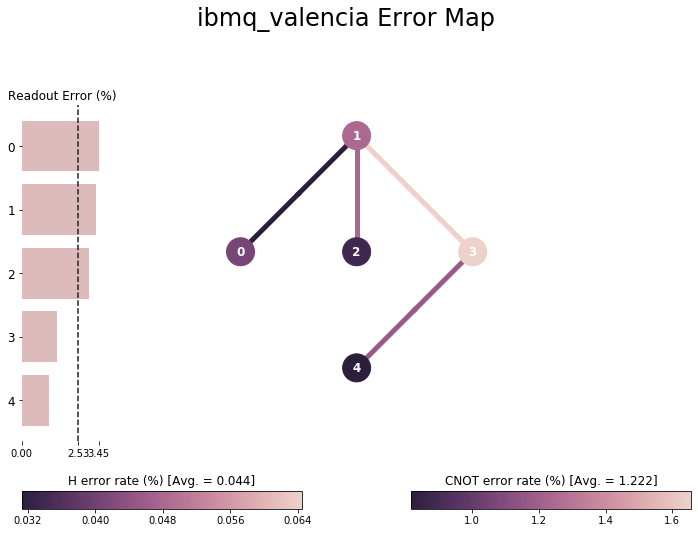

In [23]:
plot_error_map(backend)

## Shor

In [71]:
N=21

In [72]:
shor=Shor(N)

In [3]:
backend = Aer.get_backend('qasm_simulator')
#result = shor.run(backend)
#print("The factors of {} computed by the Shor's algorithm: {}.".format(N, result['factors'][0]))

In [ ]:
circuit = shor.construct_circuit(True)
circuit.draw()

## Grover

In [79]:
truthtable = '0000000000000010'
oracle = TruthTableOracle(truthtable)

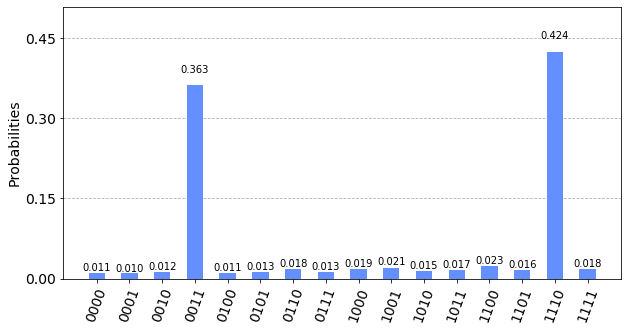

In [80]:
grover = Grover(oracle)
result = grover.run(backend)
plot_histogram(result['measurement'], figsize=(10,5))

In [24]:
# A logical expression is composed of logical operators & (AND), | (OR), ~ (NOT), and ^ (XOR), 
# as well as symbols for literals (variables).
# For example: 
#    ‘a & b’, 
#    (v0 | ~v1) ^ (~v2 & v3)

#oracle2 = LogicalExpressionOracle('~a & ~b | ~c & ~d | e')
oracle2 = LogicalExpressionOracle('a | b & c')


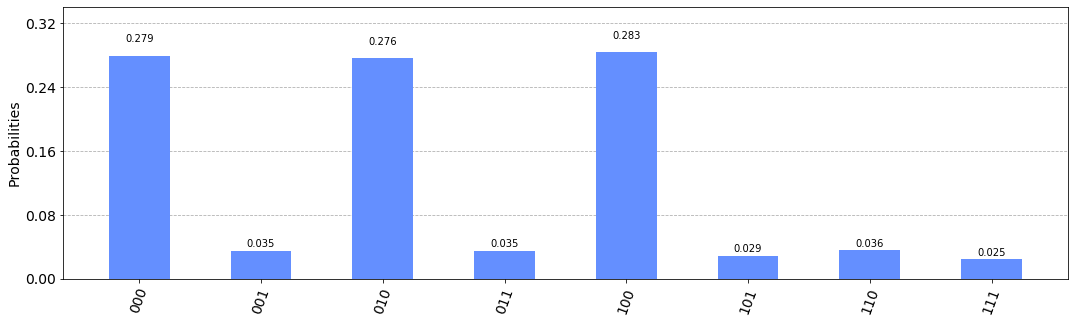

In [25]:
grover = Grover(oracle2)
result = grover.run(backend)
plot_histogram(result['measurement'], figsize=(18,5))